# Project Introduction
#### Table of Contents
- [1. League of Legends Overview](#league-of-legends-overview)
  - [How it's played](#How-it's-played)
  - [Complexity and META](#Complexity-and-META)
  - [The Competitive Scene](#The-Competitive-Scene)
- [2. Project Objective](#Project-Objective)
- [3. Basic EDA](#Basic-EDA)
  - [i. About the Dataset](#About-the-Dataset)
  - [ii. Exploring the Dataset](#Exploring-the-Dataset)   
    - [Game length analysis](#game-length)
    - [Red Team vs Blue Team](#Red-Team-vs-Blue-Team)
    - [Objective Variables](#Objectives-as-Variable)
    - [Statistical Testing](#statistical-testing)
      - [Correlation Coefficient](#pearsons-correlation-coefficient)
      - [T-Test](#t-test)
    - [Kill analysis](#Kill-analysis)
- [4. Prediction with RNN](#Prediction-with-RNN)
  - [i. Data preparation](#data-preparation)
    - [Data Extraction](#extracting-neccessary-data)
    - [Data Manupilation](#manupilating-data)
    - [Data Normalisation](#data-normalisation)
    - [Building Dataset](#building-dataset)
  - [ii. RNN](#recurrent-neural-network)
    - [Building Model](#building-model)
    - [Training Model](#training-model)
    - [Loss and Accuracy](#training-and-validation-lossaccuracy)
    - [Testing Model](#testing-the-model)
    - [Match Prediction](#predicting-match-result-with-model)
    - [2016 SWC Finals](#predicting-2016-season-world-championship-finals)

### League of Legends Overview

<p align="center">
  <img src="assets/Cover.jpg" alt="Cover art" style="width: 100%; height: 100%;">
  
</p>

source: [link](https://wallpaperaccess.com/league-of-legends-logo)

League of Legends (LoL) is one of the world’s most popular multiplayer online battle arena (MOBA) game, developed by Riot Games. It features a team-based competitive game mode based on strategy and outplaying opponents. The game features two teams of five players, each controlling a champion with unique abilities and strengths. The objective of the game is to destroy the enemy team's Nexus, a structure located in their base, while defending their own.

##### How it's played
Each team assigns their players to different areas of <span style="color:green">Summoner’s Rift</span>, the most commonly used map in League of Legends, to face off against an opponent and attempt to gain control for their team. As the game progresses, players complete a variety of tasks, including <span style="color:red">killing computer-controlled minions</span> , <span style="color:red">removing turrets</span> (which protect eachteam’s side of the map respectively), and <span style="color:red">eliminating champions</span> (player-controlled characters). Players use the <span style="color:gold">gold</span> they earn from these objectives to power up their champion and increase their teams control of the game. When a team is able to use those advantages to move into the enemy team’s base and break the <span style="color:cyan">Nexus</span>, they secure the victory.

<p align="center">
  <img src="assets/rift_map.png" alt="Summoner's Rift" style="width: 60%; height: 60%;">
</p>

source: [link](https://www.leagueoflegends.com/en-sg/)

##### Complexity and META
League of Legends is a highly complex multiplayer online battle arena (MOBA) game with various game mechanics, including strategy, teamwork, communication, and quick decision-making.
As of 3/17/2023 the game features 163 unique champions and each of them has their own abilities, strengths and weaknesses. On top of this, the game also has a large variety of items, runes and materies for the player to use every game. This large variety of attributes allows the game to be highly customisable and allows players to always develop unique strategies and the most effective tactics available (META) as time progresses. In addition, the developer also pushes out regular patches that can weaken or strengthen certain champions or items which can shift the META considerably.  

##### The Competitive Scene
The highly competitive and widely recognized eSport of League of Legends is considered a significant contributor to the legitimacy of the industry, with an extensive global following. Riot Games oversees the organization of the League Championship Series (LCS) and the League of Legends European Championship (LEC) in North America and Europe, respectively. These events consist of ten professional teams each and take place in Los Angeles and Berlin. Corresponding regional competitions are also held in other regions such as China's LPL and South Korea's LCK. These regional competitions culminate in the highly anticipated annual World Championship event.

### Project Objective
We aim to be able to predict the outcome of any particular match using combination of various predictor variables such as gold diff, baron kill, game duration, etc


---
# Basic EDA

### Import Essential libraries

Nothing special, just importing some essential Python Libraries
> NumPy : Library for Numeric Computations in Python   
> Pandas : Library for Data Acquisition and Preparation   
> Matplotlib : Low-level library for Data Visualisation   
> Seaborn : Higher-level library for Data Visualisation   

In [2]:
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=(FutureWarning, UserWarning, DeprecationWarning))
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from ast import literal_eval

---
### About the Dataset
> We will be analysing the dataset sourced from Kaggle, [here](https://www.kaggle.com/datasets/chuckephron/leagueoflegends?select=LeagueofLegends.csv). Let's first take a look at all the available columns that is documented in the file `_columns.csv`. It consists of names of all the columns and its description.

In [305]:
columns = pd.read_csv("datasets/_columns.csv")
print("Shape of columns: ", columns.shape)
columns

Shape of columns:  (57, 2)


,ColumnName,ColumnDescription
0,Address,website address the data is scraped from \r\n
1,League,League or Tournament the match took place in ...
2,Year,Year the match took place in \r\n
3,Season,Spring or Summer depending on which half of th...
4,Type,"Season, Playoffs, Regional, or International m..."
5,blueTeamTag,Blue Team's tag name (ex. Team SoloMid is TSM...
6,bResult,Result of the match for Blue Team - 1 is a wi...
7,rResult,Result of the match for Red Team - 1 is a win...
8,redTeamTag,Red Team's Tag Name (ex. Team SoloMid is TSM)...
9,gamelength,Game length in minutes \r\n


> Now lets take a look at the dataset. We can see that there is 57 columns and 7620 entries which matches with `_columns.csv`

In [306]:
# Import Dataset
league_data = pd.read_csv("datasets/LeagueofLegends.csv")

# Shape of Dataset
print("Data dims: ", league_data.shape)

# Sneakpeak of Dataset
league_data.head()

Data dims:  (7620, 57)


,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...",...,Azir,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Cop,Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",BunnyFuFuu,Janna,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...",...,Lulu,"[475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...",KEITH,KogMaw,"[475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...",Xpecial,Janna,"[515, 515, 583, 721, 870, 1059, 1205, 1342, 15...","['RekSai', 'Rumble', 'LeeSin']",http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20...",...,Lulu,"[475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...",Maplestreet8,Corki,"[475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...",Dodo8,Annie,"[475, 475, 538, 671, 817, 948, 1104, 1240, 136...","['Rumble', 'Sivir', 'Rengar']",http://matchhistory.na.leagueoflegends.com/en/...


In [307]:
# Information about the variables
league_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7620 entries, 0 to 7619
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   League            7620 non-null   object
 1   Year              7620 non-null   int64 
 2   Season            7620 non-null   object
 3   Type              7620 non-null   object
 4   blueTeamTag       7582 non-null   object
 5   bResult           7620 non-null   int64 
 6   rResult           7620 non-null   int64 
 7   redTeamTag        7583 non-null   object
 8   gamelength        7620 non-null   int64 
 9   golddiff          7620 non-null   object
 10  goldblue          7620 non-null   object
 11  bKills            7620 non-null   object
 12  bTowers           7620 non-null   object
 13  bInhibs           7620 non-null   object
 14  bDragons          7620 non-null   object
 15  bBarons           7620 non-null   object
 16  bHeralds          7620 non-null   object
 17  goldred       

> We can see that the Dataset consist of matches from CBLoL, CLS, EULCS, IEM, LCK, LCL, LJL, LLN, LMS, MSI, NALCS, OPL, RR, TCL as well as World Championships (WC). From year 2014 to 2018. Majority of data falls within 2016 to 2017.

['NALCS' 'EULCS' 'LCK' 'LMS' 'CBLoL' 'TCL' 'OPL' 'CLS' 'LLN' 'LJL' 'LCL'
 'WC' 'MSI' 'IEM' 'RR']
[2015 2016 2017 2014 2018]


<AxesSubplot:xlabel='Year', ylabel='count'>

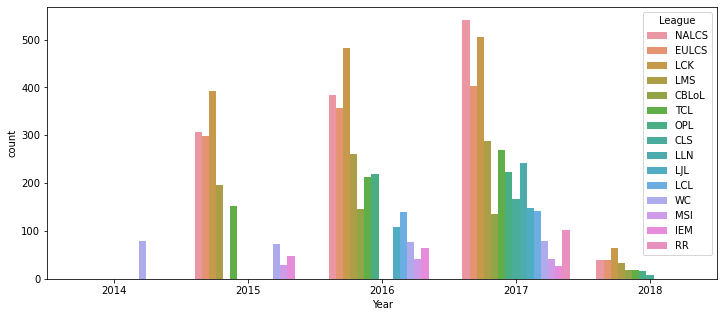

In [6]:
f = plt.figure(figsize=(12,5))
df = pd.DataFrame(league_data[["League", "Year"]])
print(df["League"].unique())
print(df["Year"].unique())

# count plot
sns.countplot(data=league_data, x='Year', hue='League')

---
### Exploring the Dataset
Now lets look into some variables and how we can interpret them in the context of the game


##### Game length
For starters, let's take a look at the game length of a game. I do not think it will be a good predictor of a match's outcome, but we can still explore it for some insight of the game.

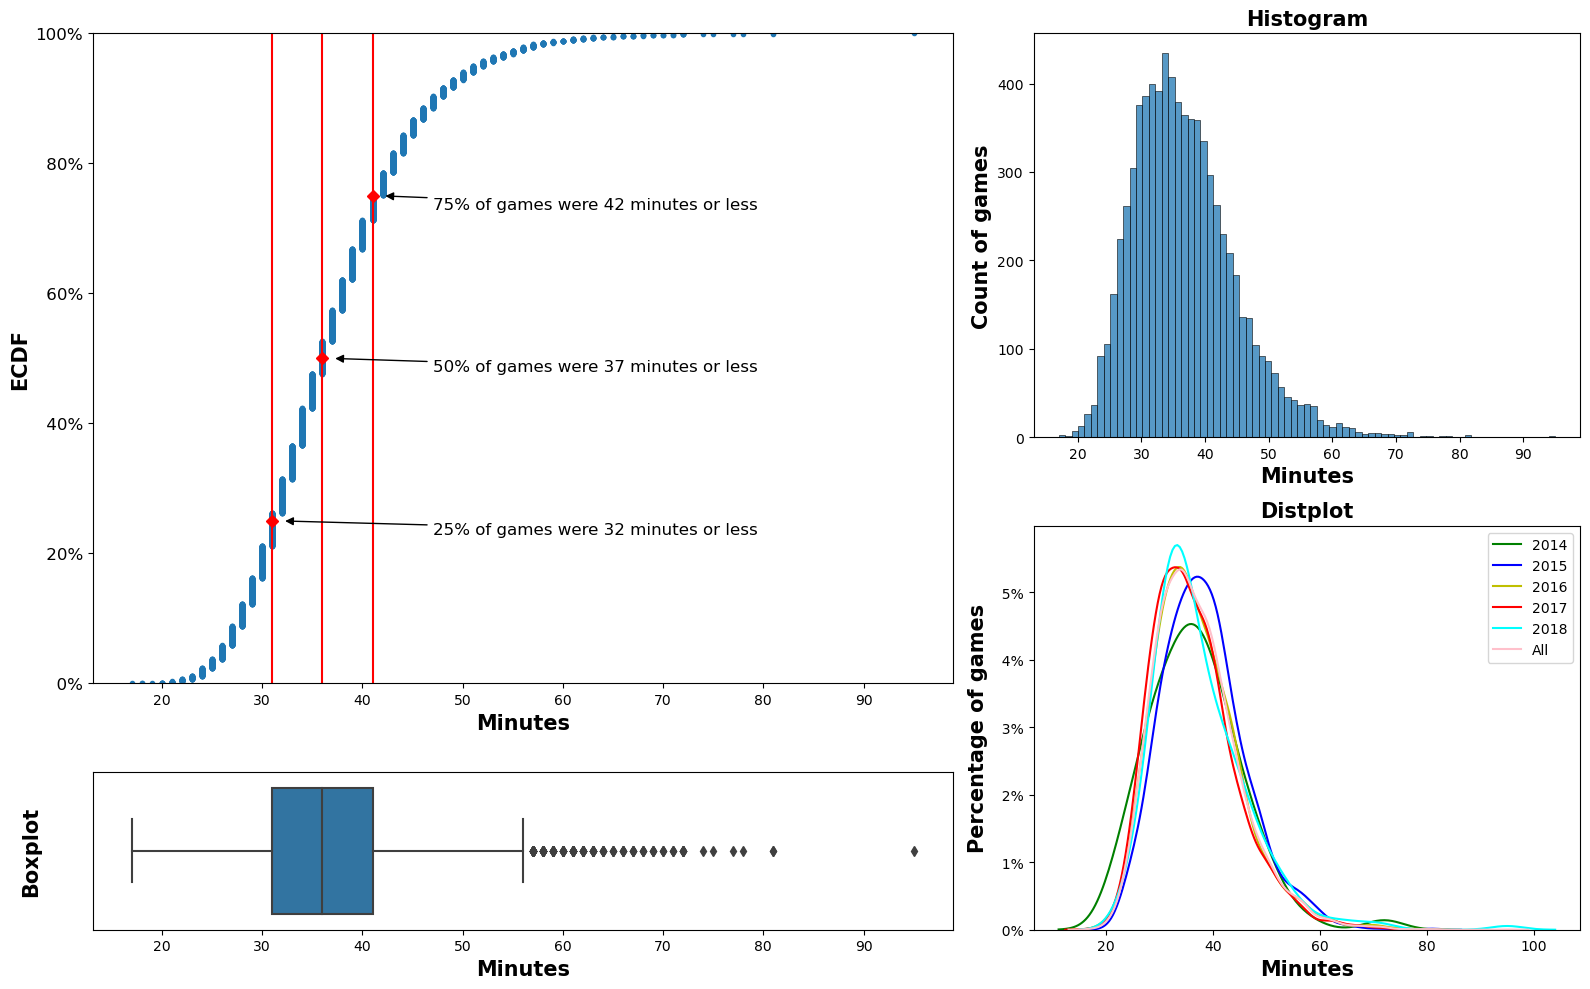

In [7]:
length_df = league_data.copy(deep=True)
plt.style.use('default')

f, ax = plt.subplots(4, 5, figsize=(16, 10))


# boxplot
s1 = plt.subplot2grid((4,5), (3,0), colspan=3, rowspan=1)
box = sns.boxplot(data=length_df['gamelength'], orient='h')
plt.xlabel('Minutes', fontsize=15, fontweight='bold')       # Label x axis
plt.ylabel('Boxplot\n\n', fontsize=15, fontweight='bold')   # Label y axis
plt.yticks([])

# ECDF plot
s2 = plt.subplot2grid((4,5), (0,0), colspan=3, rowspan=3)
percentiles = np.array([25, 50, 75])                                                    
p = np.percentile(length_df['gamelength'], percentiles)                                 # Get percentiles with np arrays
sns.ecdfplot(length_df['gamelength'], palette='rocket', marker='.', linestyle='none')   # plot ECDF plot
plt.plot(p, percentiles/100, marker='D', color='red', linestyle='none')                 # plot marker at percentiles
yvals = s2.get_yticks()                                                                 
s2.set_yticklabels(['{:3.0f}%'.format(y*100) for y in yvals])                           # set y ticks to be percentage
plt.axvline(p[0], color='red')                                                          # plot vertical line at percentiles
plt.axvline(p[1], color='red')                                                          # plot vertical line at percentiles
plt.axvline(p[2], color='red')                                                          # plot vertical line at percentiles
plt.yticks(fontsize=12)                                                                 # y tick font size
plt.xlabel('Minutes', fontsize=15, fontweight='bold')                                   # Label x axis
plt.ylabel('ECDF', fontsize=15, fontweight='bold')                                      # Label y axis
plt.margins(0.05)                                                                       # shift graph to align with boxplot
plt.annotate('25% of games were 32 minutes or less', xy=(32, .25), xytext=(47, .23), fontsize=12, arrowprops=dict(facecolor='black', arrowstyle='-|>')) # annotate the percentiles
plt.annotate('50% of games were 37 minutes or less', xy=(37, .5), xytext=(47, .48), fontsize=12, arrowprops=dict(facecolor='black', arrowstyle='-|>'))  # annotate the percentiles
plt.annotate('75% of games were 42 minutes or less', xy=(42, .75), xytext=(47, .73), fontsize=12, arrowprops=dict(facecolor='black', arrowstyle='-|>')) # annotate the percentiles

# histogram
s3 = plt.subplot2grid((4,5),(0,3), colspan=2, rowspan=2)
sns.histplot(length_df['gamelength'])
plt.xlabel('Minutes', fontsize=15, fontweight='bold')                                   # Label x axis
plt.ylabel('Count of games', fontsize=15, fontweight='bold')                            # Label y axis
plt.title('Histogram', fontsize=15, fontweight='bold' )                                 # set title


# distplot
pal = sns.color_palette('rocket')
length_df['Year_cat'] = pd.Categorical(length_df.Year)
s4 = plt.subplot2grid((4,5),(2,3), colspan=2, rowspan=2)
sns.distplot((length_df['gamelength'][length_df['Year']==2014]), hist=False, color='g', label='2014')
sns.distplot((length_df['gamelength'][length_df['Year']==2015]), hist=False, color='b', label='2015')
sns.distplot((length_df['gamelength'][length_df['Year']==2016]), hist=False, color='y', label='2016')
sns.distplot((length_df['gamelength'][length_df['Year']==2017]), hist=False, color='r', label='2017')
sns.distplot((length_df['gamelength'][length_df['Year']==2018]), hist=False, color='cyan', label='2018')
sns.distplot(length_df['gamelength'], hist=False, color='pink', label='All')
yvals = s4.get_yticks()
s4.set_yticklabels(['{:3.0f}%'.format(y*100) for y in yvals])
plt.xlabel('Minutes', fontsize=15, fontweight='bold')                                   # Label x axis
plt.ylabel('Percentage of games', fontsize=15, fontweight='bold')                            # Label y axis
plt.title('Distplot', fontsize=15, fontweight='bold' )                                 # set title


plt.legend()
plt.tight_layout()
plt.show()

> We did an analysis of the GameLength with a few different types of plotting methods:   
>   
> - **Boxplot** - A very standard boxplot that shows the quartiles and median of game length   
>    
> - **ECDF** (Empirical Cumulative Distribution Function) - This is more detailed way to view percent of variable data at certain level and not just limited to the quartiles and medium compared to in boxplot. We can see that the quartiles and median in ECDF do infact matches with the boxplot.   
>    
> - **Histogram** - A basic histogram that shows the distribution of game length of matches. We can see that it is positively skewed with the mode = ~37 minutes.   
>    
> - **Distribution plot** - Same as histogram but allows for a clearer comparison between game length of matches between different years. Here we can clearly see that matches in 2015 seems to have a longer game length than the rest of the years. Perhaps due to some changes in the META.

In [8]:
length_df['Year']

0       2015
1       2015
2       2015
3       2015
4       2015
        ... 
7615    2018
7616    2018
7617    2018
7618    2018
7619    2018
Name: Year, Length: 7620, dtype: int64

---
##### Red Team vs Blue Team
We can see that in general, there is a bias towards <span style='color:cyan'>Blue</span> team for winning. This can actually be explained by game design.
1. **Pick order rules** - <span style='color:cyan'>Blue</span> team has the rights to pick champion first. this is especially important in competitive matches as having the first pick is advantages since this could mean securing a champion that is considerably strong in the current META.   
2. **Ganking Advantage** -  Ganks are when players from other lanes roam to assist another lane. And due to the map design, <span style='color:cyan'>Blue</span> side top lanes are much safer from ganks as compared to the Red side and this can significantly impact the win rate of top lanes in general.
3. **Camera Angle & HUD positioning** - Due to the way the HUD is positioned and the screen perspective in League of Legends, it is much easier to dodge skillshots on blue side, especially in the bottom lane. If you are shoved into tower on <span style='color:red'>Red</span> side, positioning the camera to easily see everything you need to pay attention to is difficult. The minimap, your champion stats and your item box all cover up small portions of the Rift that appear to be even more annoying when you are playing on <span style='color:red'>Red</span> side. 
4. **Objectives positioning** - Positioning of objectives such as Dragon and Rift Harold is much more favorable to the <span style='color:cyan'>Blue</span> side. This allow the <span style='color:cyan'>Blue</span> team to have significant advantages early game and this effect could snowball.

So, perhaps we need to take into account of this during our analysis.

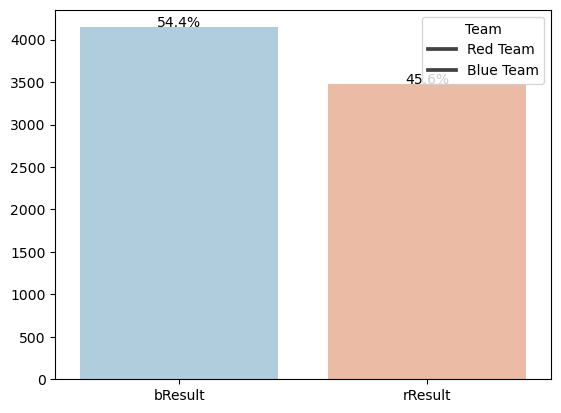

In [9]:
win_df = pd.DataFrame(league_data[['rResult', 'bResult']])

# filter the data to only include rows where value=1
data_filtered = pd.melt(win_df, var_name='Team', value_name='Win').query('Win == 1')

# count the number of occurrences of each team in the filtered dataframe
counts = data_filtered['Team'].value_counts()

# create the bar plot
ax = sns.barplot(x=counts.index, y=counts.values, palette='RdBu_r')

# set the legend labels
ax.legend(title='Team', labels=['Red Team', 'Blue Team'])

# add percentage labels to the bars
total = len(data_filtered)
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height / total)
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + 2, s=percentage, ha='center')

# show the plot
plt.show()

> As we can see, it is quite troublesome to work with `bResult` and `rResult` to tell who won for each match.   
> Now lets create a new column `winner` with `1` if <span style="color:cyan">blue</span> team won and `2` if <span style="color:red">red</span> team won. This way it is easier for us to compare other variables to who won.

In [10]:
# Make a copy of df to work with
clean_df = league_data.copy(deep=True)

# Make a new column to show winners
clean_df['winner'] = np.where(clean_df['bResult'] == 1, 1, 2)
print(clean_df['winner'].value_counts())

1    4146
2    3474
Name: winner, dtype: int64


---
#### Objectives as Variables

Objectives can be a good predictor of outcome of games.   
Now lets choose some columns that can be important factor to a game's outcome to do analysis on:
* `blueTeamTag` <span style='color:cyan'>Blue</span> team's tag name (e.g. Team SoloMid is TSM)
* `goldblue`    <span style='color:cyan'>Blue</span> Team's total <span style='color:gold'>gold</span> value by minute
* `bKills`	    List of <span style='color:cyan'>Blue</span> Team's kills - [Time in minutes, Victim, Killer, Assist1, Assist2, Assist3, Assist4, x_pos, y_pos]
* `bTowers`     List of minutes that <span style='color:cyan'>Blue</span> Team destroyed a tower and Tower Location
* `bInhibs`     List of minutes that <span style='color:cyan'>Blue</span> Team destroyed an inhibitor and Location
* `bDragons`    List of minutes that <span style='color:cyan'>Blue</span> Team killed a dragon
* `bBarons`     List of minutes that <span style='color:cyan'>Blue</span> Team killed a baron
* `bHeralds`    List of minutes that <span style='color:cyan'>Blue</span> Team killed a rift herald

* `redTeamTag`  <span style='color:red'>Red</span> team's tag name   
* `goldred`	    <span style='color:red'>Red</span> Team's total <span style='color:gold'>gold</span> value by minute
* `rKills`	    List of <span style='color:red'>Red</span> Team's kills
* `rTowers`     List of minutes that <span style='color:red'>Red</span> Team destroyed a tower and Tower location
* `rInhibs`     List of minutes that <span style='color:red'>Red</span> Team destroyed an inhibitor and Location
* `rDragons`    List of minutes that <span style='color:red'>Red</span> Team killed a dragon
* `rBarons`     List of minutes that <span style='color:red'>Red</span> Team killed a baron
* `rHeralds`    List of minutes that <span style='color:red'>Red</span> Team killed a rift herald

In [11]:
# Convert columns with lists object to real lists
cols = ['bKills', 'rKills', 'goldblue', 'goldred', 'bTowers', 'rTowers', 'bInhibs', 'rInhibs', 'bDragons', 'rDragons', 'bBarons', 'rBarons', 'bHeralds', 'rHeralds', 'golddiff']

for col in cols:
    clean_df[col] = clean_df[col].apply(literal_eval)


In [12]:
# make a new df with only columns we are onterested in
# sums up all the variables
new_df = pd.DataFrame()

new_df['blueTeamTag'] = clean_df['blueTeamTag']
new_df['goldbluetotal'] = clean_df['goldblue'].apply(max)
new_df['bKills'] = clean_df['bKills'].apply(len)
new_df['bTowers'] = clean_df['bTowers'].apply(len)
new_df['bDragons'] = clean_df['bDragons'].apply(len)
new_df['bInhibs'] = clean_df['bInhibs'].apply(len)
new_df['bBarons'] = clean_df['bBarons'].apply(len)
new_df['bHeralds'] = clean_df['bHeralds'].apply(len)

new_df['redTeamTag'] = clean_df['redTeamTag']
new_df['goldredtotal'] = clean_df['goldred'].apply(max)
new_df['rKills'] = clean_df['rKills'].apply(len)
new_df['rTowers'] = clean_df['rTowers'].apply(len)
new_df['rDragons'] = clean_df['rDragons'].apply(len)
new_df['rInhibs'] = clean_df['rInhibs'].apply(len)
new_df['rBarons'] = clean_df['rBarons'].apply(len)
new_df['rHeralds'] = clean_df['rHeralds'].apply(len)

new_df['winner'] = clean_df['winner']
new_df = new_df.reset_index(drop=True)

new_df


,blueTeamTag,goldbluetotal,bKills,bTowers,bDragons,bInhibs,bBarons,bHeralds,redTeamTag,goldredtotal,rKills,rTowers,rDragons,rInhibs,rBarons,rHeralds,winner
0,TSM,62729,16,9,1,2,0,0,C9,56672,9,4,3,0,1,0,1
1,CST,57702,10,7,3,0,1,0,DIG,56537,9,7,1,1,0,0,2
2,WFX,70270,22,15,4,4,1,0,GV,56355,8,2,0,0,0,0,1
3,TIP,58612,10,4,0,0,1,0,TL,63119,21,7,4,1,0,0,2
4,CLG,60269,22,8,2,1,1,0,T8,48947,10,4,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7615,YC,57580,7,4,0,0,0,0,SUP,65618,16,9,3,1,2,0,2
7616,GAL,69781,8,5,2,0,2,0,DP,70498,18,10,2,2,0,1,2
7617,SIN,34602,5,0,0,0,0,0,DW,52338,13,11,2,3,1,1,2
7618,LGC,68729,16,9,4,1,2,0,TTC,57221,2,3,0,0,0,0,1


Here lets have a simple visualisation of the distributions of the variables

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


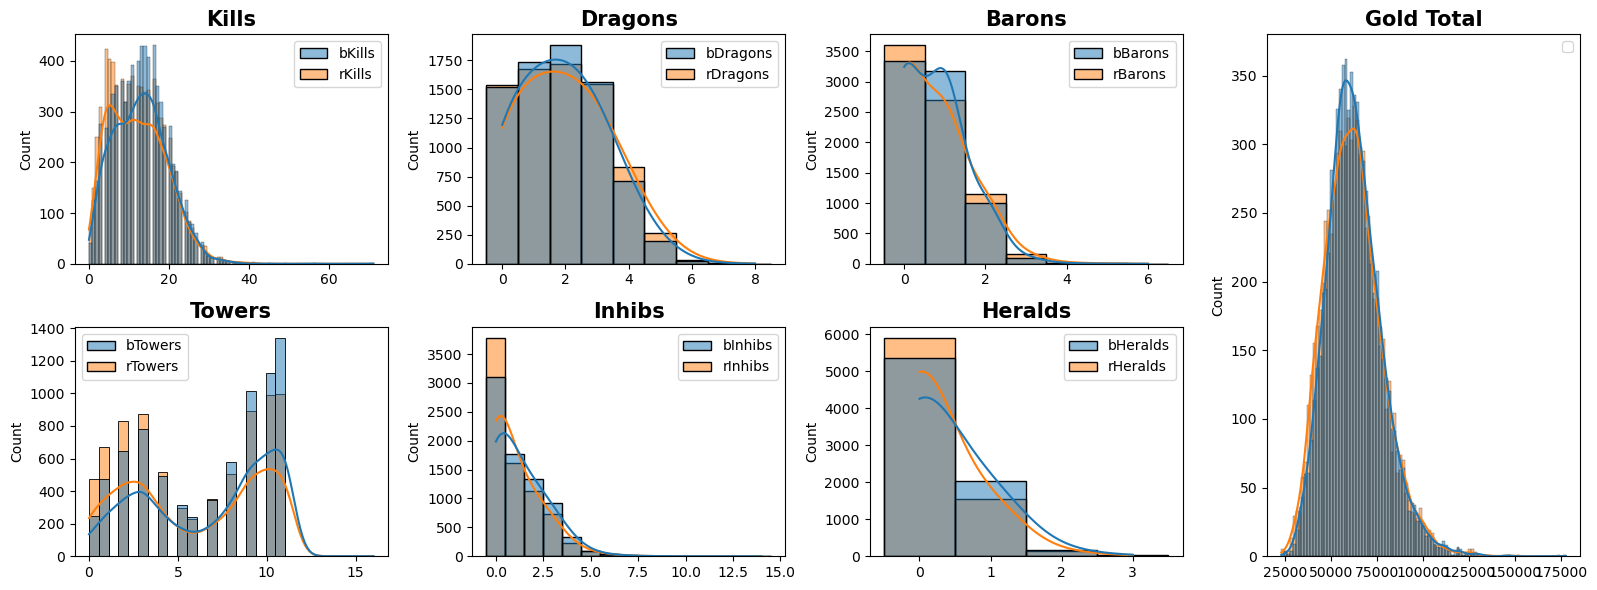

In [13]:
f, ax = plt.subplots(2, 4, figsize=(16,6))

# kills
g1 = plt.subplot2grid((2,4), (0,0), colspan=1, rowspan=1)
sns.histplot(new_df[['bKills', 'rKills']], kde=True)
# sns.kdeplot(new_df[['bKills', 'rKills']], bw_adjust=5)
plt.title('Kills', fontsize=15, fontweight='bold' ) 

# dragons
g2 = plt.subplot2grid((2,4), (0,1), colspan=1, rowspan=1)
sns.histplot(new_df[['bDragons', 'rDragons']], kde=True, discrete=True, kde_kws={'bw_adjust':3.5})
# sns.kdeplot(new_df[['bDragons', 'rDragons']], bw_adjust=5)
plt.title('Dragons', fontsize=15, fontweight='bold' ) 

# barons
g3 = plt.subplot2grid((2,4), (0,2), colspan=1, rowspan=1)
sns.histplot(new_df[['bBarons', 'rBarons']], kde=True, discrete=True, kde_kws={'bw_adjust':3.5})
# sns.kdeplot(new_df[['bBarons', 'rBarons']], bw_adjust=4)
plt.title('Barons', fontsize=15, fontweight='bold' ) 

# towers
g4 = plt.subplot2grid((2,4), (1,0), colspan=1, rowspan=1)
sns.histplot(new_df[['bTowers', 'rTowers']], kde=True)
# sns.kdeplot(new_df[['bTowers', 'rTowers']], bw_adjust=4)
plt.title('Towers', fontsize=15, fontweight='bold' ) 

# inhibs
g5 = plt.subplot2grid((2,4), (1,1), colspan=1, rowspan=1)
sns.histplot(new_df[['bInhibs', 'rInhibs']], kde=True, discrete=True, kde_kws={'bw_adjust':3.5})
plt.title('Inhibs', fontsize=15, fontweight='bold' ) 

# heralds
g6 = plt.subplot2grid((2,4), (1,2), colspan=1, rowspan=1)
sns.histplot(new_df[['bHeralds', 'rHeralds']], kde=True, discrete=True, kde_kws={'bw_adjust':6})

plt.title('Heralds', fontsize=15, fontweight='bold' ) 

# gold
g7 = plt.subplot2grid((2,4), (0,3), colspan=1, rowspan=2)
sns.histplot(new_df[['goldbluetotal', 'goldredtotal']], kde=True)
plt.title('Gold Total', fontsize=15, fontweight='bold' ) 


plt.legend()
plt.tight_layout()
plt.show()

#### Statistical Testing



##### Pearson's Correlation Coefficient
Let's start off with **Pearson's Correlation Coefficient** since we can easily do it.

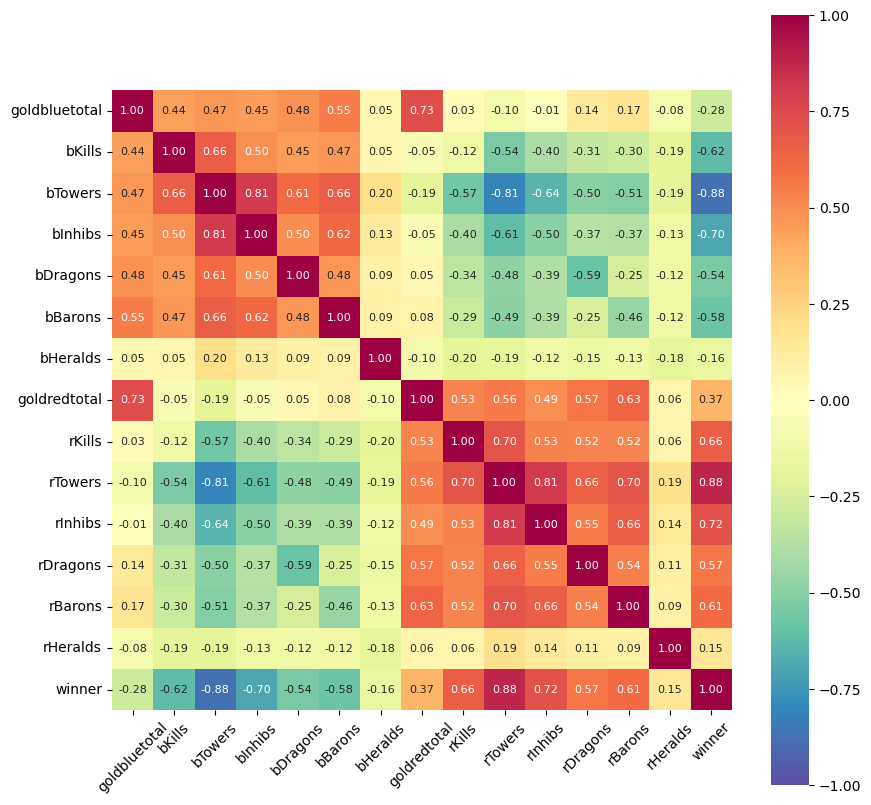

In [14]:
# correlation map of all variables without the team tags
fig = plt.figure(figsize=(10,10))

sns.heatmap(new_df[['goldbluetotal','bKills', 'bTowers', 'bInhibs', 'bDragons', 'bBarons', 'bHeralds', 'goldredtotal','rKills', 'rTowers', 'rInhibs', 'rDragons', 'rBarons', 'rHeralds', 'winner']].corr(),
            vmin=-1, vmax=1,fmt='.2f', annot=True, annot_kws={'size':8}, square=True, cmap='Spectral_r')

plt.xticks(rotation=45)
plt.show()


Let's choose the top 5 variables ranked by correlation (we can add more later if we want)
- Tower Takedowns: ~0.88
- Inhibitor Takedowns: ~0.71
- Enemies Killed: ~0.64
- Baron Kills: ~0.60
- Dragon Kills: ~0.56

Intepretations of these objectives:
> **Tower Takedowns**: One of the main objectives of this game. Tower kills grants a hefty sum of <span style='color:gold'>gold</span> and also allow the team to have a easier time reaching enemy base.   
>   
> **Inhibitor Takedowns**: Taking down enemy inhibitors allows for ally superminions to spawn, which are significantly stronger variant of minions that can help advance towards enemy base.   
>    
> **Enemies Killed**: Killing an enemy will remove the enemy from game play for a certain amount of time. Allowing allies to take objectives within this window.   
>    
> **Baron Kills**: A side objective in late game. Killing the Baron temporarily grants allies a significant buff to their stats. Hence, giving allies an advantage during team fights.   
>    
> **Dragon Kills**: A side objective in game. Killing the Dragon permanently grants allies a stackable buff depending on the Dragon's type. Arguably one of the most important objective in game.

Note: Surprisingly, <span style='color:gold'>gold</span> has lower correlation (~0.37) than the other objectives despite it being one of the more important factor in this gmae.

##### T-test

Since what we are ultimately trying to achieve is to predict the outcome of the match (categorical either Blue wins or Red wins) with various independant variables, we can do a t-test first to see whether the individual variables do have a effect on the outcome.   

Null hypothesis, $H_0$: Independent sample means are equal, i.e. variable does not affect outcome   
Alternate Hypothesis, $H_a$: Independent sample means are not equal, i.e. variable affects outcome   
Significance level, $\alpha$ = 0.05


In [15]:
# make a copy of df, and change winner to be categorical
ttestdf = new_df.copy(deep=True)
ttestdf['winner'] = ttestdf['winner'].astype('category')
ttestdf['winner'].replace(1,'blue', inplace=True)
ttestdf['winner'].replace(2,'red', inplace=True)

# seperate data by winners
testblue = pd.DataFrame(ttestdf[ttestdf['winner']=='blue'])
testred = pd.DataFrame(ttestdf[ttestdf['winner']=='red'])
testred.head()

,blueTeamTag,goldbluetotal,bKills,bTowers,bDragons,bInhibs,bBarons,bHeralds,redTeamTag,goldredtotal,rKills,rTowers,rDragons,rInhibs,rBarons,rHeralds,winner
1,CST,57702,10,7,3,0,1,0,DIG,56537,9,7,1,1,0,0,red
3,TIP,58612,10,4,0,0,1,0,TL,63119,21,7,4,1,0,0,red
5,DIG,31022,4,0,0,0,0,0,TIP,38074,8,10,3,2,0,0,red
8,C9,59589,8,6,0,0,1,0,GV,70503,22,11,4,4,1,0,red
13,TIP,40857,4,2,1,0,0,0,CLG,51711,12,11,3,2,1,0,red


We have observed above that most of these variables are not of normal distribution, however we can solve this by doing t-test repeatedly on multiple small samples. This aligns with the **Central Limit Theorem (CLT)** where normal or non-normally distributed variables, when summed up will normalise towards a normal distribution. 

In [16]:
variables = ['goldbluetotal','bKills', 'bTowers', 'bInhibs', 'bDragons', 'bBarons', 'bHeralds', 'goldredtotal','rKills', 'rTowers', 'rInhibs', 'rDragons', 'rBarons', 'rHeralds']
tfin = []
pfin = []
vfin = []
pavg = []
tavg = []
vavg = []
for var in variables:
    pavg.clear()
    tavg.clear()
    for i in range(5000):
        # randomly select from population
        sample1 = np.random.choice(testblue[var], 100)
        sample2 = np.random.choice(testred[var], 100)
        t_val, p_val = stats.ttest_ind(sample1, sample2)
        pavg.append(p_val)
        tavg.append(t_val)
        vavg.append(np.var(testblue[var])/np.var(testred[var]))
        # taking average
    pfin.append(sum(pavg)/len(pavg))
    tfin.append(sum(tavg)/len(tavg))
    vfin.append(sum(vavg)/len(vavg))


In [17]:
results = pd.DataFrame(list(zip(vfin, tfin, pfin)), index=variables, columns=['variance_ratio', 't_statistics', 'p_value'])
results.head(15)

,variance_ratio,t_statistics,p_value
goldbluetotal,0.750019,4.197514,4.441882e-03
bKills,0.905055,11.235577,4.179346e-13
bTowers,0.714765,25.824539,1.943344e-51
bInhibs,1.175400,14.265418,3.717828e-17
bDragons,1.159410,9.220452,1.805289e-09
bBarons,1.202765,10.379661,2.712968e-11
bHeralds,1.250170,2.296543,9.932328e-02
goldredtotal,1.270327,-5.792181,9.357348e-05
rKills,1.230237,-12.517553,9.831601e-17
rTowers,1.393368,-27.367622,8.883089e-52


For a t-test to be valid, the following have to follow:   
1. Sample taken should be representative of population -> hence we used random selection of samples
2. Sample follows a normal distribution -> solved by Central Limit Theorem
3. Homogenity of variance -> the variance of 2 sample being used should not exceed a ratio of 4:1

From our result, we can see that the variance is relatively homogenuous. The p_value of all variables except bHerald and rHerald is < 0.05. So we can reject the null hypothesis for all variable except Heralds.      
Looking at the t_statistics, we can see the top 5 most significant variables is **Towers -> Inhibs -> Kills -> Barons -> Dragons**, which is consistent with our findings using corr coeff.

---
#### Kill analysis

read in data from `kills.csv`

In [308]:
kill_data = pd.read_csv('datasets/kills.csv')
kill_data.head()

,Address,Team,Time,Victim,Killer,Assist_1,Assist_2,Assist_3,Assist_4,x_pos,y_pos
0,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.820,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469
1,http://matchhistory.na.leagueoflegends.com/en/...,bKills,16.286,C9 LemonNation,TSM WildTurtle,TSM Santorin,TSM Bjergsen,TSM Lustboy,NaN,13908,5960
2,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.733,C9 Hai,TSM Bjergsen,TSM Santorin,TSM WildTurtle,TSM Lustboy,NaN,8281,7889
3,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.880,C9 Meteos,TSM Dyrus,TSM Santorin,TSM Bjergsen,TSM WildTurtle,TSM Lustboy,8522,8895
4,http://matchhistory.na.leagueoflegends.com/en/...,bKills,27.005,C9 Balls,TSM Bjergsen,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy,8902,7643


##### KPM
> Let's look at the average kills per minute(<span style='color:orange'>KPM</span>) of over 7620 games. Here we can see that most of the kills happened within 15 - 35 mins. We can also see that the <span style='color:orange'>KPM</span> plateau off after 45 mins, this is most likely because most proffessional games does not last past 45 mins.

Text(0, 0.5, 'Average Kills per Minute')

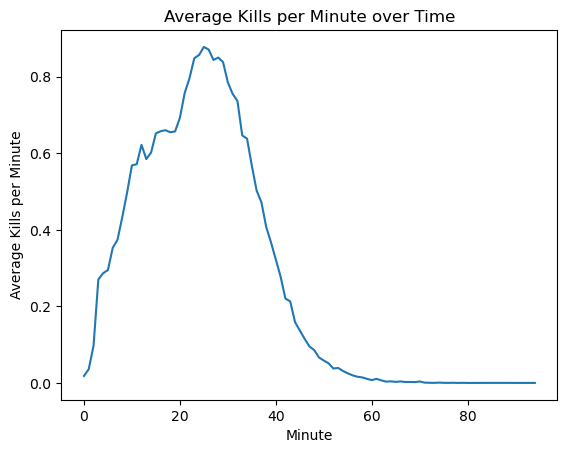

In [19]:
# Drop missing values
kill_data = kill_data.dropna(subset=['Time'])

# Convert the 'Time' column to an integer representing the minute
kill_data['Minute'] = kill_data['Time'].astype(int)

# Group the DataFrame by minute and calculate the average number of kills per minute
kills_per_minute = kill_data.groupby('Minute').size().div(7620)

# Create a line plot of the average kills per minute over time
sns.lineplot(x=kills_per_minute.index, y=kills_per_minute.values)

plt.title('Average Kills per Minute over Time')
plt.ylabel('Average Kills per Minute')

##### KDA
> Let's look at the TOP 10 best K/D and KDA for the entire dataset.   
> K/D is the ratio of a player's <span style='color:red'>Kill</span> to <span style='color:purple'>Death</span> ratio.   
> KDA is takes into account of a player's <span style='color:green'>assists</span> stats as well.   
> Both are indicators of a player's performance in a game.
> Since K/D only accounts for <span style='color:red'>kills</span> of a player, it is usually used to compare between the performance of carries of the team.   
> While that would be unfair to be used to compare the performance of a support since support usually are not to get kills but instead assist his carry to, hence KDA is used instead.

Text(0.5, 0.98, '2014-2018')

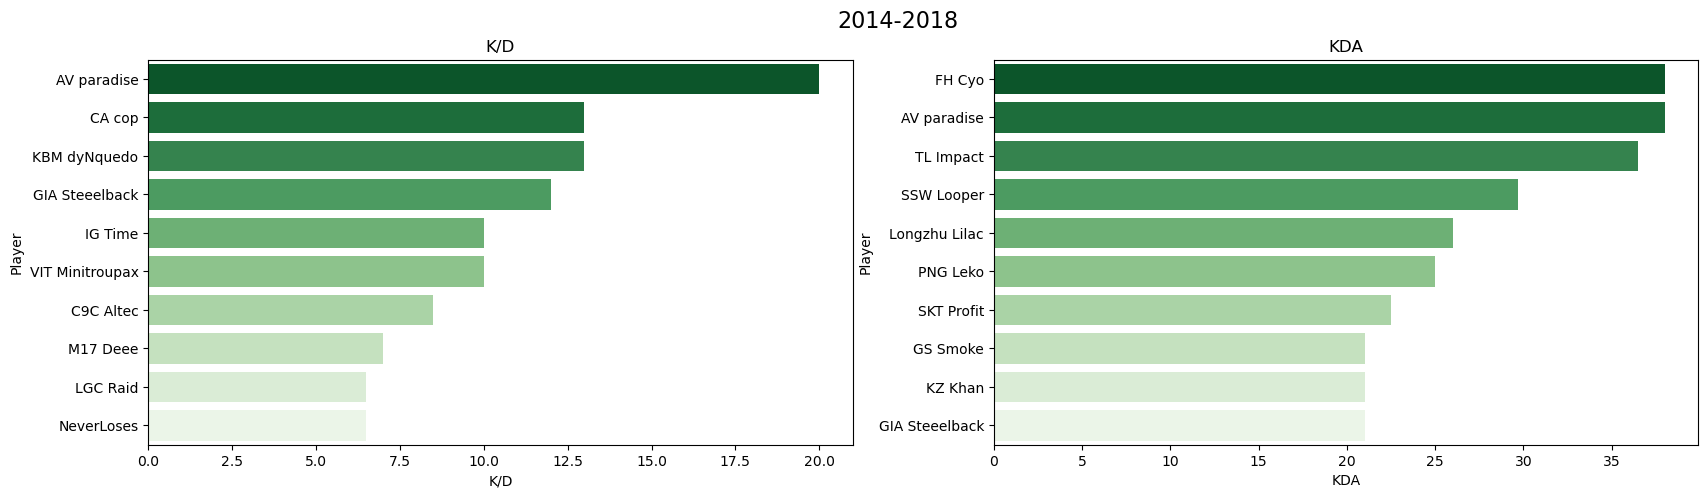

In [20]:
f, axes = plt.subplots(1, 2, figsize=(20, 5))

# melt assist
assist = pd.melt(kill_data, id_vars=['Assist_1'], value_vars=['Assist_2','Assist_3','Assist_4'])

# K/D
kd = (kill_data['Killer'].value_counts()) / (kill_data['Victim'].value_counts())
kd_data = kd.sort_values(ascending=False).iloc[:10].reset_index()
kd_data.columns = ['Player', 'K/D']
sns.barplot(y=kd_data['Player'], x=kd_data['K/D'],ax=axes[0], palette='Greens_r')

# KDA
kda = (kill_data['Killer'].value_counts() + assist['Assist_1'].value_counts()) / (kill_data['Victim'].value_counts())
kda_data = kda.sort_values(ascending=False).iloc[:10].reset_index()
kda_data.columns = ['Player', 'KDA']
sns.barplot(y=kda_data['Player'], x=kda_data['KDA'],ax=axes[1], palette='Greens_r')

# Set the title for each subplot
axes[0].set_title('K/D')
axes[1].set_title('KDA')
f.suptitle('2014-2018', fontsize=16)

> Let's also look at the most recent 2 years (2017-2018) in the dataset. We can see that the players do change, and this is also the nature of esports, players rises and falls over time.

Text(0.5, 0.98, '2017-2018')

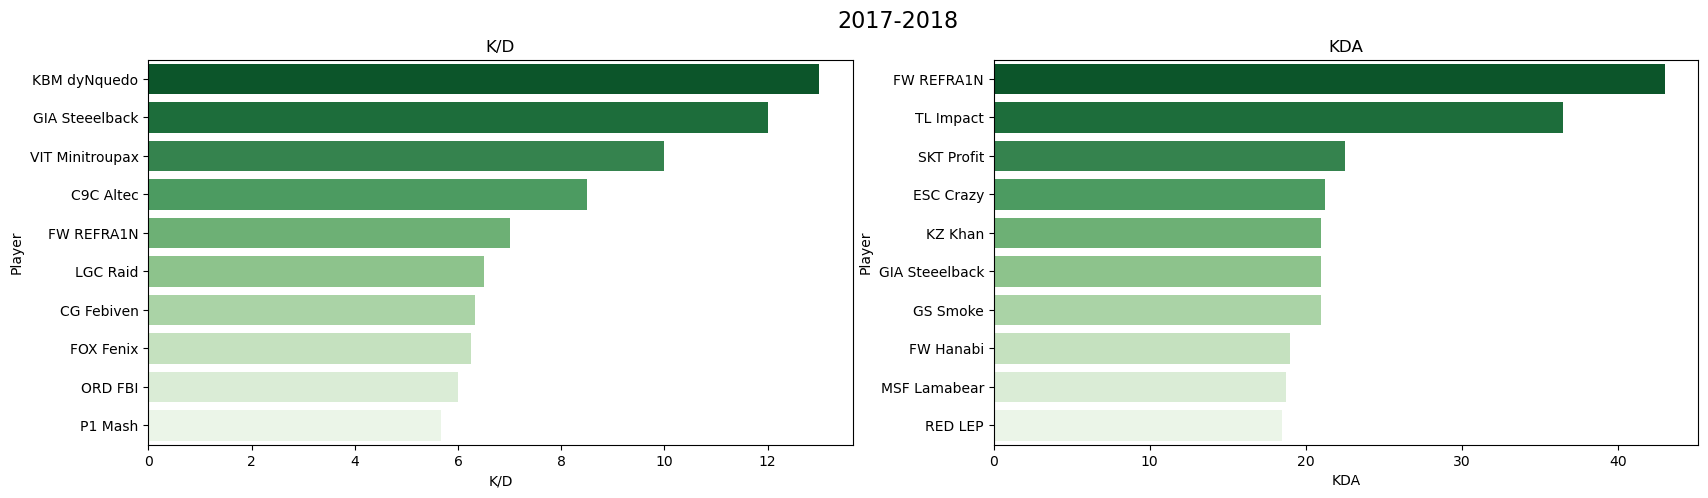

In [21]:
kill_data2 = kill_data.copy(deep=True)
league_data2 = league_data.copy(deep=True)
league_data2 = league_data2[(league_data2['Year'] == 2018) | (league_data2['Year'] == 2017)]
address_id = league_data2['Address'].unique()
filtered_kill = kill_data2[kill_data2['Address'].isin(address_id)] # filter kills for only matches in 2017 - 2018

f, axes = plt.subplots(1, 2, figsize=(20, 5))

# melt assist
assist = pd.melt(filtered_kill, id_vars=['Assist_1'], value_vars=['Assist_2','Assist_3','Assist_4'])

# K/D
kd = (filtered_kill['Killer'].value_counts()) / (filtered_kill['Victim'].value_counts())
kd_data = kd.sort_values(ascending=False).iloc[:10].reset_index()
kd_data.columns = ['Player', 'K/D']
sns.barplot(y=kd_data['Player'], x=kd_data['K/D'],ax=axes[0], palette='Greens_r')

# KDA
kda = (filtered_kill['Killer'].value_counts() + assist['Assist_1'].value_counts()) / (filtered_kill['Victim'].value_counts())
kda_data = kda.sort_values(ascending=False).iloc[:10].reset_index()
kda_data.columns = ['Player', 'KDA']
sns.barplot(y=kda_data['Player'], x=kda_data['KDA'],ax=axes[1], palette='Greens_r')

# Set the title for each subplot
axes[0].set_title('K/D')
axes[1].set_title('KDA')
f.suptitle('2017-2018', fontsize=16)

##### Kill Map
> Let's try make a kill map

(-664.25, 15379.25, -537.95, 15366.95)

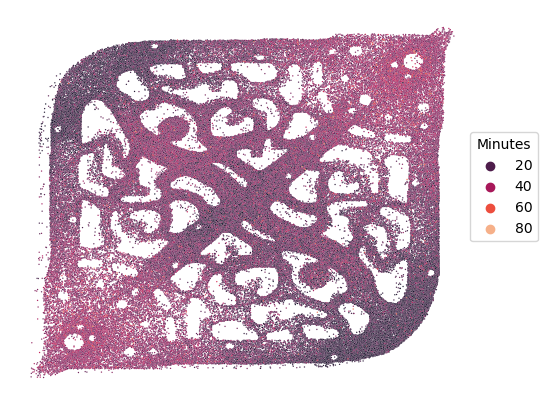

In [22]:
# simply plotting each point 
f = plt.figure(figsize=(6,5))
kill_data = kill_data.loc[kill_data.x_pos != 'TooEarly']
kill_data = kill_data.loc[kill_data.x_pos.notnull()]
kill_data['X_pos'] = kill_data['x_pos'].astype(int)
kill_data['Y_pos'] = kill_data['y_pos'].astype(int)
plt.style.use('default')
p = sns.color_palette('rocket', as_cmap='True')
sns.scatterplot(x=kill_data['X_pos'], y=kill_data['Y_pos'], s=1, hue=kill_data['Time'], palette=p)
plt.legend(title='Minutes', loc='upper right', bbox_to_anchor=(1.15, 0.7))
plt.axis('off')

> The above visualisation tells us how early of late the kills occurred depending on the color.   
>    
> Now, lets try to visualise it in terms of density of where kills occurred instead of the time that the kills occurred.

In [23]:
plt.style.use("dark_background")

<AxesSubplot:xlabel='X_pos', ylabel='Y_pos'>

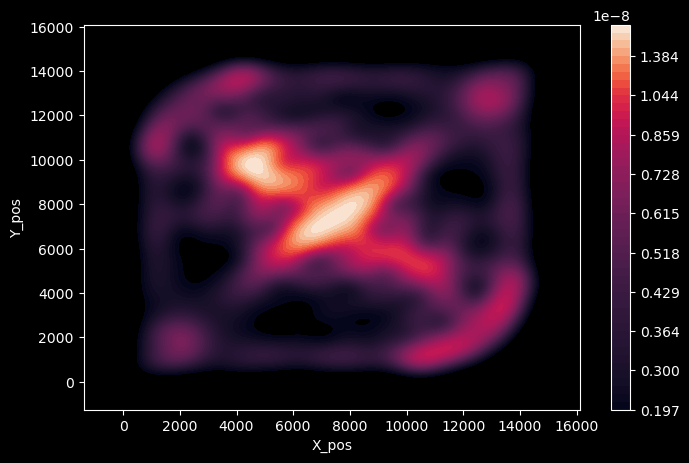

In [24]:
# attempt to make kill map with seaborn
f = plt.figure(figsize=(8,5))
plt.axis('on')
cmap2= sns.color_palette('rocket', as_cmap=True)
sns.kdeplot(data=kill_data, x='X_pos', y='Y_pos', cmap=cmap2, n_levels=50, shade=True, cbar=True)

Something interesting that we might want to find out is the ganking path of Jungles during early game. These ganks can have significant effect on the game by helping the lanes gain advantages. We can take advantage of the kill map to find out where do jungles gank in high level competitive matches.

In [25]:
# Extract all jungle players in the data set
jungle_df = clean_df.copy(deep=True)
red_jungle_player = clean_df.drop_duplicates(subset=['redJungle'])
red_jungle_player = red_jungle_player['redJungle']
blue_jungle_player = clean_df.drop_duplicates(subset=['blueJungle'])
blue_jungle_player = blue_jungle_player['blueJungle']
jungle_player = pd.concat([red_jungle_player, blue_jungle_player], ignore_index=True)
jungle_player = jungle_player.drop_duplicates().reset_index(drop=True)
jungle_player.describe()

count        358
unique       358
top       Meteos
freq           1
dtype: object

In [27]:
blue_jungle_player.describe()


count          347
unique         347
top       Santorin
freq             1
Name: blueJungle, dtype: object

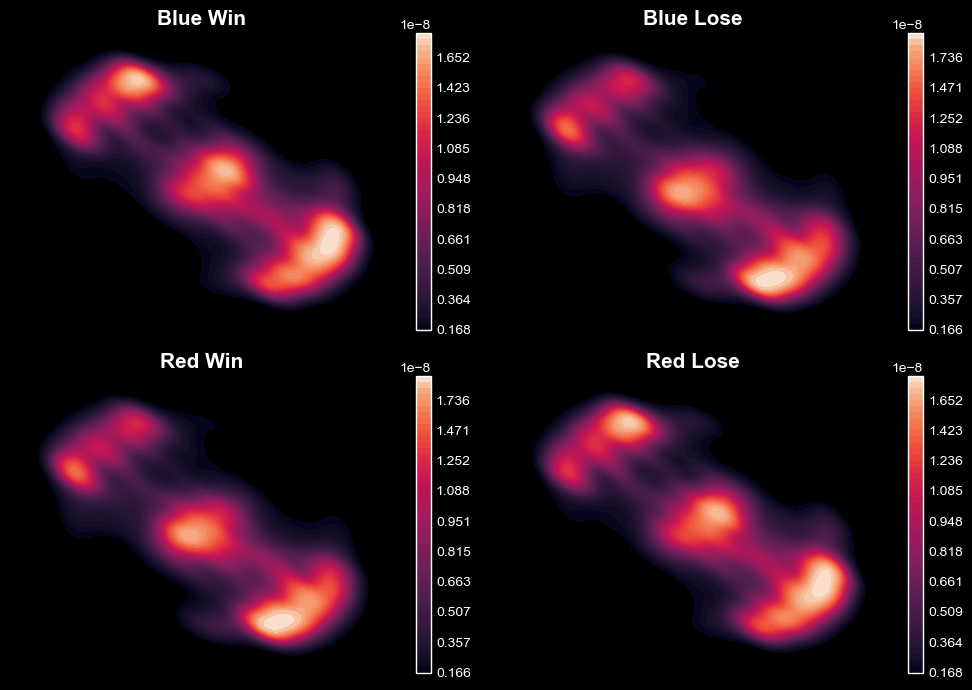

In [309]:
kill_data = pd.read_csv('datasets/kills.csv')

# extract rows where blue won
blue_win_matches = kill_data[kill_data['Address'].isin(jungle_df['Address'][jungle_df['winner'] == 1])].reset_index(drop=True)

# extract rows where only jungle is involved
blue_win_jungle_kill = blue_win_matches[blue_win_matches['Assist_1'].isin(blue_jungle_player) 
                                        | blue_win_matches['Assist_2'].isin(blue_jungle_player)
                                        | blue_win_matches['Assist_3'].isin(blue_jungle_player)
                                        | blue_win_matches['Assist_4'].isin(blue_jungle_player)
                                        | blue_win_matches['Killer'].isin(blue_jungle_player)]

# extract rows where the kill only occur before 15 minutes
blue_win_jungle_kill = blue_win_jungle_kill[blue_win_jungle_kill['Time'] <= 15]                                        

# extract rows where blue lose
blue_lose_matches = kill_data[kill_data['Address'].isin(jungle_df['Address'][jungle_df['winner'] == 2])].reset_index(drop=True)

# extract rows where only jungle is involved
blue_lose_jungle_kill = blue_lose_matches[blue_lose_matches['Assist_1'].isin(blue_jungle_player) 
                                        | blue_lose_matches['Assist_2'].isin(blue_jungle_player)
                                        | blue_lose_matches['Assist_3'].isin(blue_jungle_player)
                                        | blue_lose_matches['Assist_4'].isin(blue_jungle_player)
                                        | blue_lose_matches['Killer'].isin(blue_jungle_player)]

# extract rows where the kill only occur before 15 minutes
blue_lose_jungle_kill = blue_lose_jungle_kill[blue_lose_jungle_kill['Time'] <= 15]    

# extract rows where red won
red_win_matches = kill_data[kill_data['Address'].isin(jungle_df['Address'][jungle_df['winner'] == 2])].reset_index(drop=True)

# extract rows where only jungle is involved
red_win_jungle_kill = red_win_matches[red_win_matches['Assist_1'].isin(red_jungle_player) 
                                        | red_win_matches['Assist_2'].isin(red_jungle_player)
                                        | red_win_matches['Assist_3'].isin(red_jungle_player)
                                        | red_win_matches['Assist_4'].isin(red_jungle_player)
                                        | red_win_matches['Killer'].isin(red_jungle_player)]

# extract rows where the kill only occur before 15 minutes
red_win_jungle_kill = red_win_jungle_kill[red_win_jungle_kill['Time'] <= 15]                                        

# extract rows where red lose
red_lose_matches = kill_data[kill_data['Address'].isin(jungle_df['Address'][jungle_df['winner'] == 1])].reset_index(drop=True)

# extract rows where only jungle is involved
red_lose_jungle_kill = red_lose_matches[red_lose_matches['Assist_1'].isin(red_jungle_player) 
                                        | red_lose_matches['Assist_2'].isin(red_jungle_player)
                                        | red_lose_matches['Assist_3'].isin(red_jungle_player)
                                        | red_lose_matches['Assist_4'].isin(red_jungle_player)
                                        | red_lose_matches['Killer'].isin(red_jungle_player)]

# extract rows where the kill only occur before 15 minutes
red_lose_jungle_kill = red_lose_jungle_kill[red_lose_jungle_kill['Time'] <= 15]    

# plot map
plt.style.use('dark_background')
f, ax = plt.subplots(1, 2, figsize=(10,7))

# blue wins
blue_win_jungle_kill = blue_win_jungle_kill.loc[blue_win_jungle_kill.x_pos != 'TooEarly']
blue_win_jungle_kill = blue_win_jungle_kill[blue_win_jungle_kill.x_pos.notnull()]
blue_win_jungle_kill['X_pos'] = blue_win_jungle_kill['x_pos'].astype(int)
blue_win_jungle_kill['Y_pos'] = blue_win_jungle_kill['y_pos'].astype(int)

# sns.scatterplot(x=blue_win_jungle_kill['X_pos'], y=blue_win_jungle_kill['Y_pos'], s=1, hue=blue_win_jungle_kill['Time'], palette=p)
# plt.legend(title='Minutes', loc='upper right', bbox_to_anchor=(1.15, 0.7))
p1 = plt.subplot2grid((2,2), (0,0))
sns.kdeplot(data=blue_win_jungle_kill, x="X_pos", y="Y_pos", cmap=cmap2, n_levels=50, shade=True, cbar=True)
plt.title('Blue Win', fontsize=15, fontweight='bold' )
plt.axis('off')

# blue lose
blue_lose_jungle_kill = blue_lose_jungle_kill.loc[blue_lose_jungle_kill.x_pos != 'TooEarly']
blue_lose_jungle_kill = blue_lose_jungle_kill[blue_lose_jungle_kill.x_pos.notnull()]
blue_lose_jungle_kill['X_pos'] = blue_lose_jungle_kill['x_pos'].astype(int)
blue_lose_jungle_kill['Y_pos'] = blue_lose_jungle_kill['y_pos'].astype(int)
# sns.scatterplot(x=blue_lose_jungle_kill['X_pos'], y=blue_win_jungle_kill['Y_pos'], s=1, hue=blue_win_jungle_kill['Time'], palette=p)
# plt.legend(title='Minutes', loc='upper right', bbox_to_anchor=(1.15, 0.7))
p2 = plt.subplot2grid((2,2), (0,1))
sns.kdeplot(data=blue_lose_jungle_kill, x="X_pos", y="Y_pos", cmap=cmap2, n_levels=50, shade=True, cbar=True)
plt.title('Blue Lose', fontsize=15, fontweight='bold' )
plt.axis('off')

# red wins
red_win_jungle_kill = red_win_jungle_kill.loc[red_win_jungle_kill.x_pos != 'TooEarly']
red_win_jungle_kill = red_win_jungle_kill[red_win_jungle_kill.x_pos.notnull()]
red_win_jungle_kill['X_pos'] = red_win_jungle_kill['x_pos'].astype(int)
red_win_jungle_kill['Y_pos'] = red_win_jungle_kill['y_pos'].astype(int)

# sns.scatterplot(x=red_win_jungle_kill['X_pos'], y=red_win_jungle_kill['Y_pos'], s=1, hue=red_win_jungle_kill['Time'], palette=p)
# plt.legend(title='Minutes', loc='upper right', bbox_to_anchor=(1.15, 0.7))
p1 = plt.subplot2grid((2,2), (1,0))
sns.kdeplot(data=red_win_jungle_kill, x="X_pos", y="Y_pos", cmap=cmap2, n_levels=50, shade=True, cbar=True)
plt.title('Red Win', fontsize=15, fontweight='bold' )
plt.axis('off')

# red lose
red_lose_jungle_kill = red_lose_jungle_kill.loc[red_lose_jungle_kill.x_pos != 'TooEarly']
red_lose_jungle_kill = red_lose_jungle_kill[red_lose_jungle_kill.x_pos.notnull()]
red_lose_jungle_kill['X_pos'] = red_lose_jungle_kill['x_pos'].astype(int)
red_lose_jungle_kill['Y_pos'] = red_lose_jungle_kill['y_pos'].astype(int)
# sns.scatterplot(x=red_lose_jungle_kill['X_pos'], y=red_win_jungle_kill['Y_pos'], s=1, hue=red_win_jungle_kill['Time'], palette=p)
# plt.legend(title='Minutes', loc='upper right', bbox_to_anchor=(1.15, 0.7))
p2 = plt.subplot2grid((2,2), (1,1))
sns.kdeplot(data=red_lose_jungle_kill, x="X_pos", y="Y_pos", cmap=cmap2, n_levels=50, shade=True, cbar=True)
plt.title('Red Lose', fontsize=15, fontweight='bold' )
plt.axis('off')

plt.tight_layout()
plt.show()

**Interpretation of kill map:**  
<span style='color:cyan'>Blue</span> Win - Involvement of the <span style='color:cyan'>Blue</span> team's Jungle for matches they have won   
<span style='color:cyan'>Blue</span> Lose - Involvement of the <span style='color:cyan'>Blue</span> team's Jungle for matches they have lose   
<span style='color:red'>Red</span> Win - Involvement of the <span style='color:red'>Red</span> team's Jungle for matches they have won   
<span style='color:red'>Red</span> Lose - Involvement of the <span style='color:red'>Red</span> team's Jungle for matches they have lose   

**Analysis:**   
**For the blue team:** We can see that for the Blue team, for matches that they have won, the Jungle seems to have a higher involvement in the top lane than for the matches that they have lose. This could suggests that perhaps Blue team jungle can consider to prioritise ganking the top lane for a higher chance of winning. This could also be due to the fact shape of the game map favouring blue team for the top lane, hence translating to a higher rate of conversion for the blue team for ganking the top lane.   

**For the red team:** We can see that for the red team, for matches that they have won, the Jungle seems to have lower involvement in the top lane, but have higher involvment in the bottom lane. This could suggest that perhaps it is less efficient for red team jungle to gank top lane, but should instead invest their time in ganking the bottom lane to help them gain advantage instead.   

---
##### Cumulative Kill analysis

Lets have a more indepth analysis on kills as a winning attribute

Here we will start of with some more **cleaning** of data. We can see that both the `rKills` and `bKills` column is a list of list. What we are interested now is only the numerical data (time that each kills occurred), and we dont really need the players involved for each kill.

In [29]:
clean_df[['rKills', 'bKills']].head()

,rKills,bKills
0,"[[16.529, TSM Lustboy, C9 Balls, [C9 Meteos, C...","[[10.82, C9 Hai, TSM Bjergsen, [], 9229, 8469]..."
1,"[[12.387, CST Jesiz, DIG Gamsu, [DIG Shiphtur]...","[[11.104, DIG Shiphtur, CST Jesiz, [CST Impale..."
2,"[[8.449, WFX Altec, GV Cop, [GV BunnyFuFuu], 1...","[[5.255, GV Keane, WFX Pobelter, [WFX ShorterA..."
3,"[[7.768, TIP Rush, TL IWDominate, [TL Fenix], ...","[[8.274, TL Quas, TIP Rhux, [TIP Apollo], 3491..."
4,"[[11.988, CLG Doublelift, T8 Porpoise8, [T8 Sl...","[[11.438, T8 Dodo8, CLG Doublelift, [CLG Xmith..."


In [30]:
# helper function to extract time of kill
def extract_time(x):
    try:
        return [x[0] for x in x]
    except:
        return [0 for x in x]

In [31]:
# make new column for time of kills of each match
clean_df['bKills_time'] = clean_df['bKills'].apply(extract_time)
clean_df['rKills_time'] = clean_df['rKills'].apply(extract_time)
clean_df[['bKills_time', 'rKills_time']].head()

,bKills_time,rKills_time
0,"[10.82, 16.286, 18.733, 18.88, 27.005, 27.029,...","[16.529, 16.791, 18.784, 27.073, 29.983, 30.11..."
1,"[11.104, 12.332, 12.392, 12.665, 14.837, 25.00...","[12.387, 12.689, 14.882, 25.119, 26.214, 29.35..."
2,"[5.255, 6.351, 10.628, 12.281, 12.747, 12.979,...","[8.449, 12.91, 14.23, 17.885, 19.513, 19.64, 2..."
3,"[8.274, 12.002, 19.12, 19.23, 19.298, 26.473, ...","[7.768, 9.681, 12.03, 13.904, 17.729, 21.026, ..."
4,"[11.438, 24.766, 24.844, 25.231, 25.251, 25.28...","[11.988, 21.451, 21.636, 24.873, 25.108, 25.21..."


In [47]:
# each row now is the kill time of a specific map, for either blue or red team
kills_df = clean_df[['bKills_time', 'rKills_time']].unstack().apply(pd.Series)

# map address and winner to the df
_Address = dict(zip(clean_df.index, clean_df['Address']))
_winner = dict(zip(clean_df['Address'], clean_df['winner']))
kills_df['Address'] = kills_df.index.get_level_values(1)
kills_df['Address'] = kills_df['Address'].map(_Address)
kills_df['winner'] = kills_df.index.get_level_values(1)
kills_df['winner'] = kills_df['Address'].map(_winner)

# make index into column
kills_df = kills_df.reset_index(level=0, drop=False)
kills_df = kills_df.rename(columns={'level_0':'type'})
kills_df.head()

,type,0,1,2,3,4,5,6,7,8,...,63,64,65,66,67,68,69,70,Address,winner
0,bKills_time,10.820,16.286,18.733,18.880,27.005,27.029,27.109,28.989,29.073,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://matchhistory.na.leagueoflegends.com/en/...,1
1,bKills_time,11.104,12.332,12.392,12.665,14.837,25.008,25.134,28.412,30.128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://matchhistory.na.leagueoflegends.com/en/...,2
2,bKills_time,5.255,6.351,10.628,12.281,12.747,12.979,12.992,14.247,17.777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://matchhistory.na.leagueoflegends.com/en/...,1
3,bKills_time,8.274,12.002,19.120,19.230,19.298,26.473,29.102,36.557,37.052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://matchhistory.na.leagueoflegends.com/en/...,2
4,bKills_time,11.438,24.766,24.844,25.231,25.251,25.289,26.685,26.719,28.002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://matchhistory.na.leagueoflegends.com/en/...,1


In [168]:
# melt df 
kills_melt = pd.melt(kills_df, id_vars=['Address', 'type', 'winner'], var_name='counts').fillna(0)

# boolean 'won' column if the match is won by the team
kills_melt['won'] = False
kills_melt.loc[((kills_melt['type']=='bKills_time') & (kills_melt['winner'] == 1)) | ((kills_melt['type']=='rKills_time') & (kills_melt['winner'] == 2)), 'won'] = True
kills_melt['counts']+=1

# categories time into bins
kills_melt['bin'] = pd.cut(kills_melt['value'], bins=np.arange(0,96,5))

# remove null value and seperate into win/lose
kills_all = kills_melt[kills_melt['bin'].notnull()]
kills_all = kills_all[kills_all['value'] >=1]
kills_win = kills_all[kills_all['won'] == True]
kills_lose = kills_all[kills_all['won'] == False]

kills_melt.head()

,Address,type,winner,counts,value,won,bin
0,http://matchhistory.na.leagueoflegends.com/en/...,bKills_time,1,1,10.820,True,"(10, 15]"
1,http://matchhistory.na.leagueoflegends.com/en/...,bKills_time,2,1,11.104,False,"(10, 15]"
2,http://matchhistory.na.leagueoflegends.com/en/...,bKills_time,1,1,5.255,True,"(5, 10]"
3,http://matchhistory.na.leagueoflegends.com/en/...,bKills_time,2,1,8.274,False,"(5, 10]"
4,http://matchhistory.na.leagueoflegends.com/en/...,bKills_time,1,1,11.438,True,"(10, 15]"


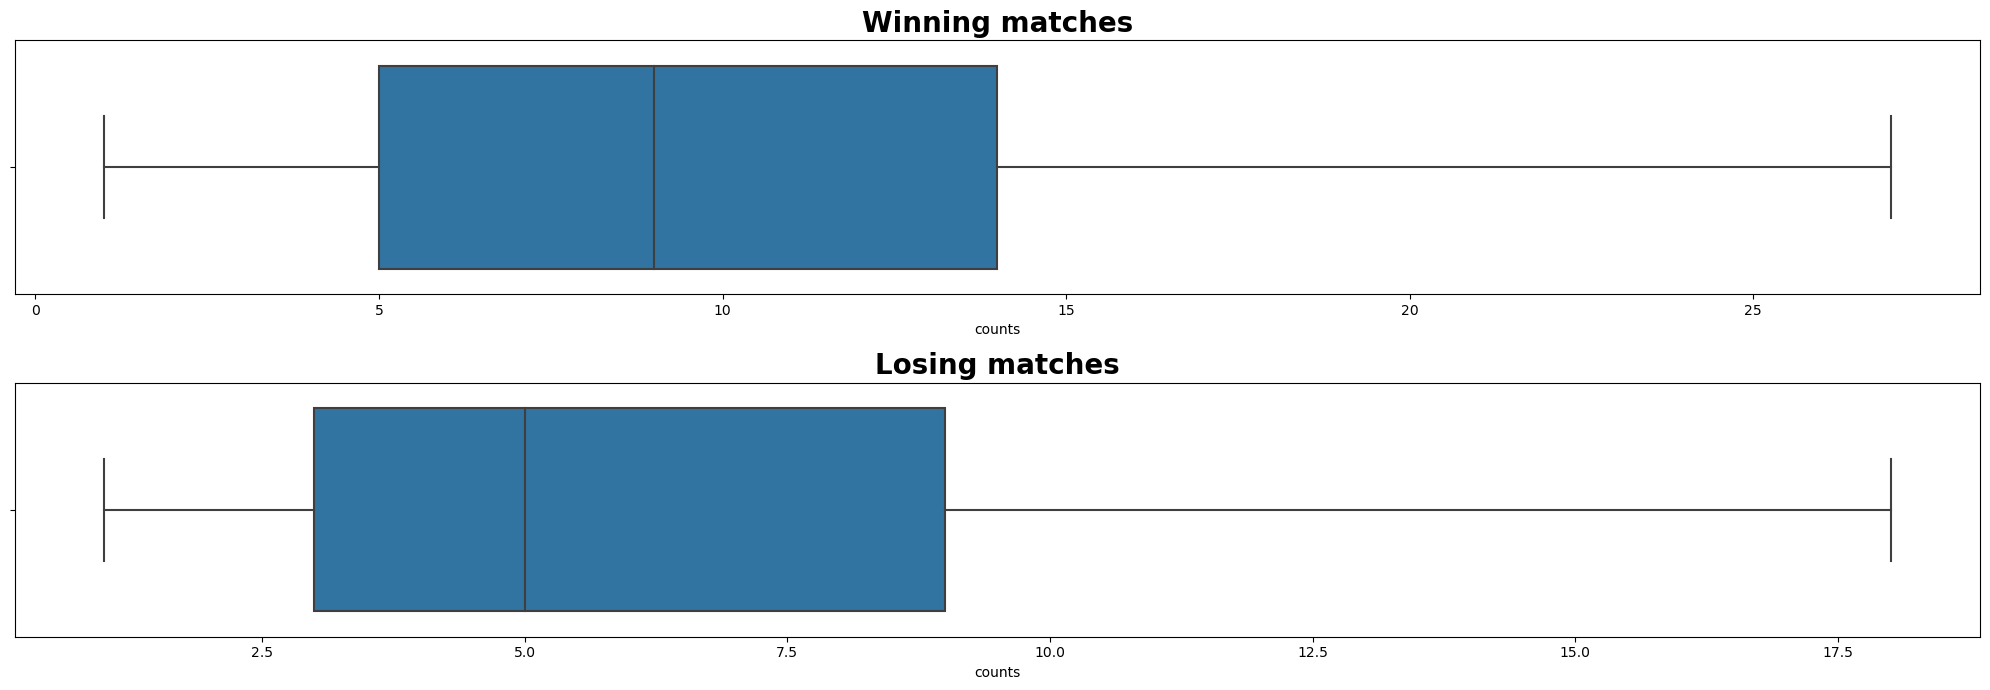

In [169]:
# a quick visualisation of kills distribution
plt.style.use('default')
f, ax = plt.subplots(2,1,figsize=(20,7))

# won
p1 = plt.subplot2grid((2,1), (0,0))
sns.boxplot(kills_win['counts'], showfliers=False)
plt.title('Winning matches', fontsize=20, fontweight='bold')

# lose
p2 = plt.subplot2grid((2,1), (1,0))
sns.boxplot(kills_lose['counts'], showfliers=False)
plt.title('Losing matches', fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()

> Kind of expected result. For matches where the team losed, they tend to have lesser kills. So, indeed kills does have some relation to the outcome of a match

Now lets try and look at the kill stats of a random game and compare their kills of losing and winning team

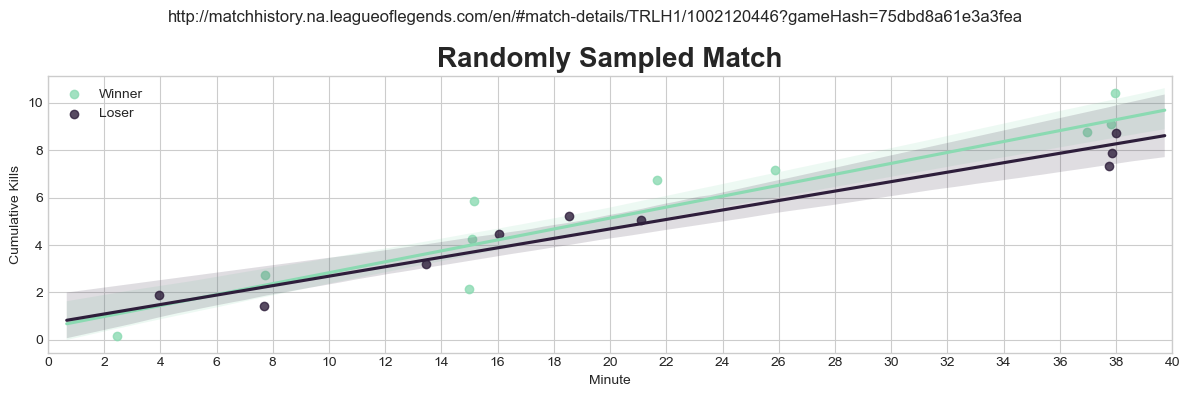

In [176]:
# sample a random game
random_game_address = kills_melt['Address'].sample().item()
random_game = kills_melt[(kills_melt['Address'] == random_game_address) & (kills_melt['bin'].notnull())]

# plot regplot
plt.style.use('seaborn-whitegrid')
color_w = sns.color_palette('mako')[5]
color_l = sns.color_palette('mako')[0]
f = plt.figure(figsize=(12,4))
sns.regplot(data=random_game[random_game['won'] == True], x='value', y='counts', y_jitter=True, color=color_w, label='Winner', truncate=False)
sns.regplot(data=random_game[random_game['won'] == False], x='value', y='counts', y_jitter=True, color=color_l, label='Loser', truncate=False)
plt.yticks(np.arange(0, max(random_game['counts'])+2, 2))
plt.xticks(np.arange(0, max(random_game['value'])+2, 2))
plt.ylabel('Cumulative Kills')
plt.xlabel('Minute')
plt.title('Randomly Sampled Match', fontsize=20, fontweight='bold')
plt.suptitle(random_game_address)

plt.legend()
plt.tight_layout()
plt.show()


It seems like in most cases, winning team tends to have a higher and steeper regression line. This is also kind of expected since winning teams most of the time can snowball and capitalise on their early kills, thus giving them more advantage as the game goes on.   

Now lets try to visualise the cumulative kills of **all** games

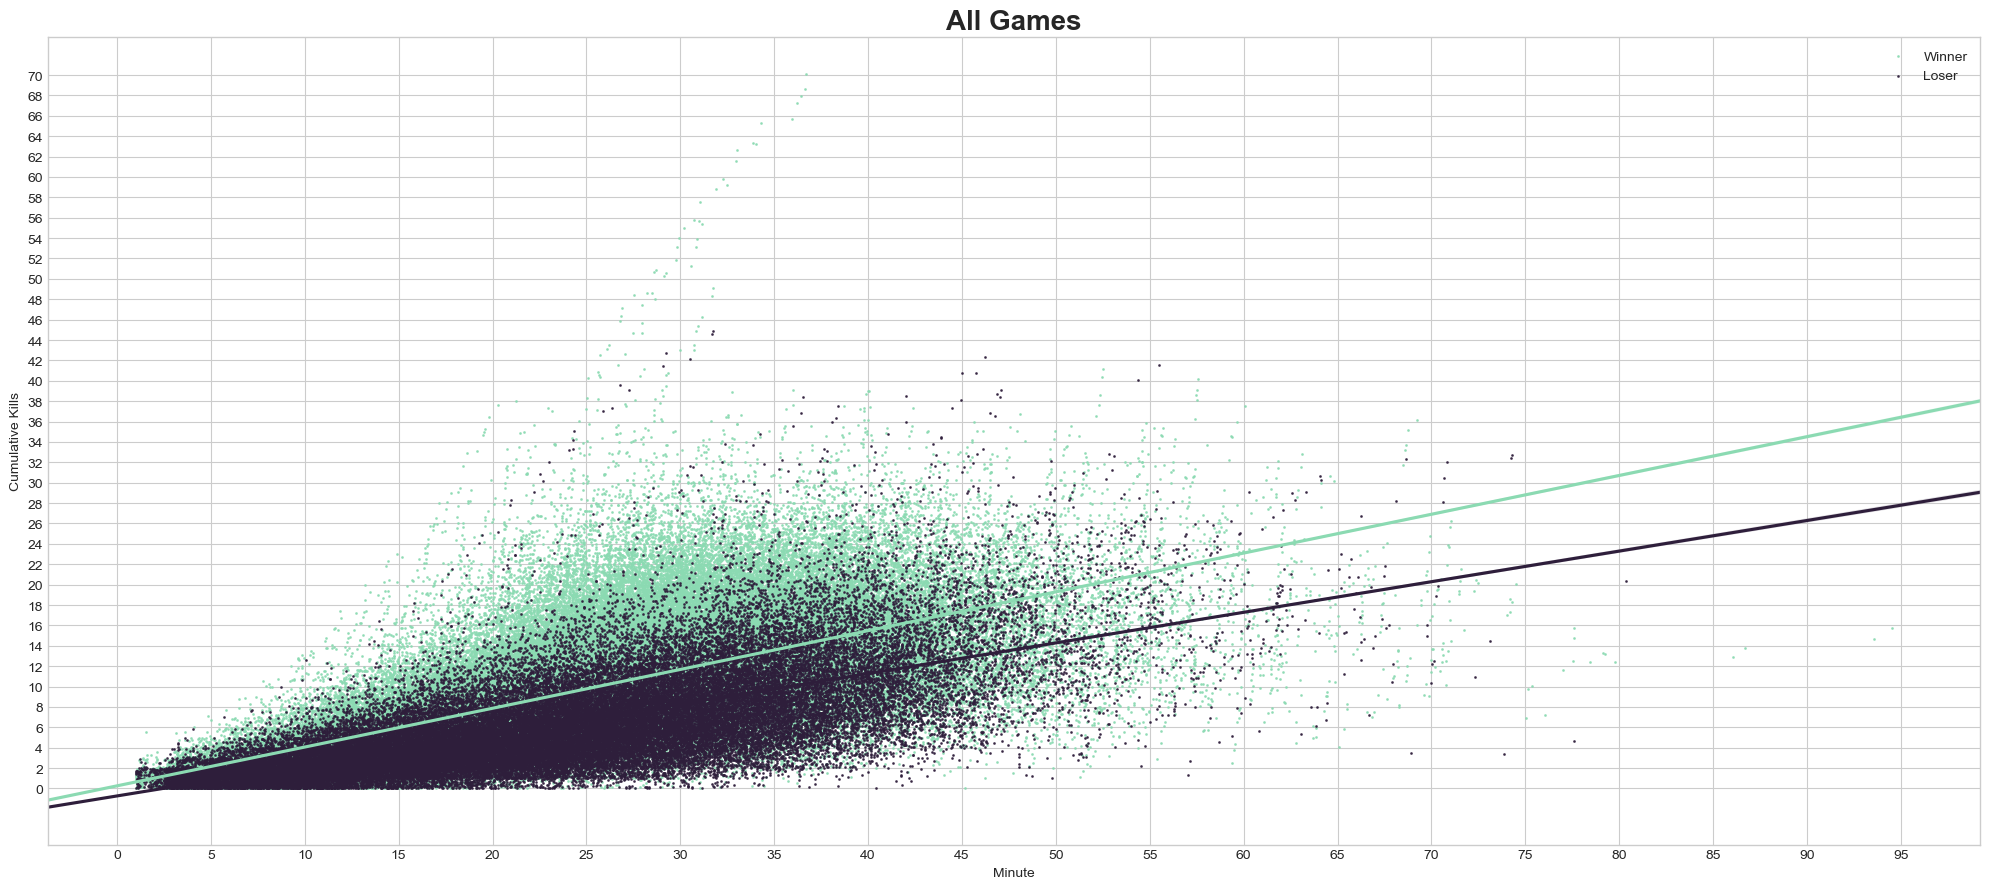

In [174]:
f = plt.figure(figsize=(20,9))

sns.regplot(data=kills_all[kills_all['won'] == True], x='value', y='counts', y_jitter=True, color=color_w, label='Winner', truncate=False, scatter_kws={'s':1})
sns.regplot(data=kills_all[kills_all['won'] == False], x='value', y='counts', y_jitter=True, color=color_l, label='Loser', truncate=False, scatter_kws={'s':1})

plt.yticks(np.arange(0, max(kills_all['counts'])+2, 2))
plt.xticks(np.arange(0, max(kills_all['value'])+5, 5))
plt.ylabel('Cumulative Kills')
plt.xlabel('Minute')
plt.title('All Games', fontsize=20, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

So it seems like the trend indeed does holds for the entire dataset on average. Having known that kill count is an important variable, we can choose to use this in our model.   

---
Continue in `LogisticRegression.ipynb`